Author: Miroshnychenko Oleg Olegovich


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import math

In [2]:
base = {'with_labels': True, 'font_color': 'black', 'font_weight': 'bold', 'node_color': 'white', 'node_size': 200,
        'width': 1.5}

#1

In [3]:
Graph = nx.Graph()
Graph.add_nodes_from(range(12))
Graph.add_edges_from(
    [(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (5, 6), (5, 7), (5, 8), (6, 7),
     (6, 8), (8, 7)])
fname = 'Graph.txt'
nx.write_adjlist(Graph, fname)

#2

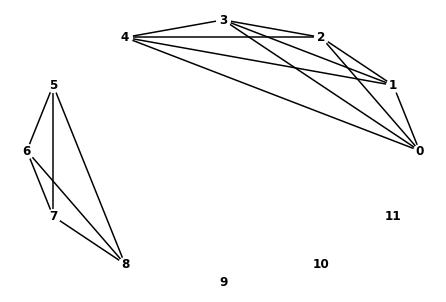

In [4]:
Graph = nx.read_adjlist(fname, nodetype=int)
Graph.edges
nx.draw_circular(Graph, **base)
plt.savefig("Graph_1.png")

#3

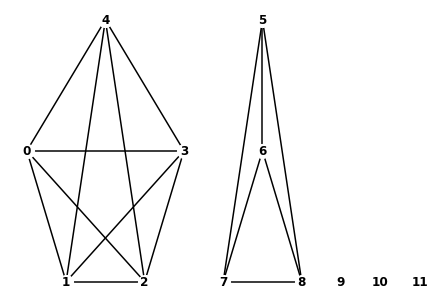

In [5]:
Graph = nx.read_adjlist(fname, nodetype=int)
pos = {0: (0, 2), 1: (1, 1), 2: (3, 1), 3: (4, 2), 4: (2, 3), 5: (6, 3), 6: (6, 2), 7: (5, 1), 8: (7, 1), 9: (8, 1),
       10: (9, 1), 11: (10, 1)}
nx.draw(Graph, pos=pos, **base)
plt.savefig("Graph_2.png")

#4

graph nodes: 5
graph edges: 10
graph diameter: 1
graph radius: 1
graph eccentricity for node 0 : 1
graph eccentricity for node 1 : 1
graph eccentricity for node 2 : 1
graph eccentricity for node 3 : 1
graph eccentricity for node 4 : 1


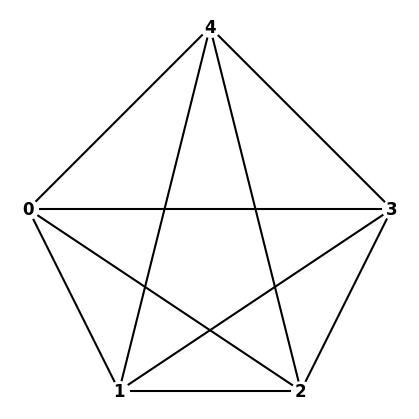

graph nodes: 4
graph edges: 6
graph diameter: 1
graph radius: 1
graph eccentricity for node 5 : 1
graph eccentricity for node 6 : 1
graph eccentricity for node 7 : 1
graph eccentricity for node 8 : 1


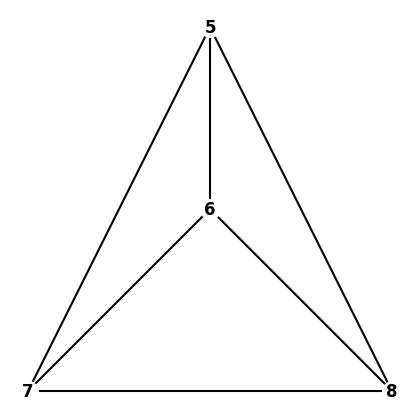

graph nodes: 1
graph edges: 0
graph diameter: 0
graph radius: 0
graph eccentricity for node 9 : 0


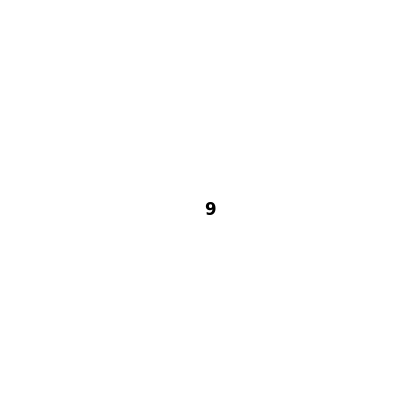

graph nodes: 1
graph edges: 0
graph diameter: 0
graph radius: 0
graph eccentricity for node 10 : 0


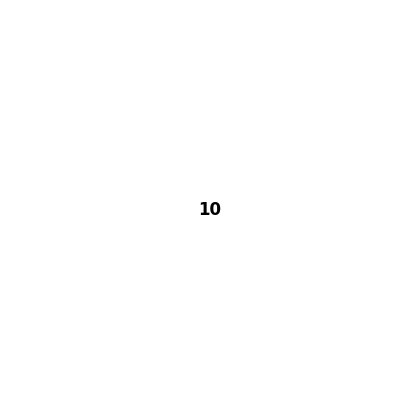

graph nodes: 1
graph edges: 0
graph diameter: 0
graph radius: 0
graph eccentricity for node 11 : 0


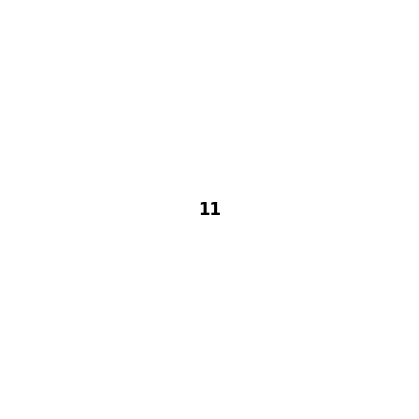

In [6]:
Graph = nx.read_adjlist(fname, nodetype=int)
node_number = 0
for component in nx.connected_components(Graph):
    sub = Graph.subgraph(component)
    subgraph_nodes = nx.number_of_nodes(sub)
    subgraph_edges = nx.number_of_edges(sub)
    subgraph_dim = nx.diameter(sub)
    subgraph_rad = nx.radius(sub)
    subgraph_ecc = nx.eccentricity(sub)
    plt.figure(figsize=(4, 4), dpi=100)
    nx.draw(sub, pos=pos, **base,)
    print("graph nodes:", subgraph_nodes)
    print("graph edges:", subgraph_edges)
    print("graph diameter:", subgraph_dim)
    print("graph radius:", subgraph_rad)
    for el in subgraph_ecc.values():
        print("graph eccentricity for node", node_number, ":", el)
        node_number += 1
    for node in component:
        plt.show()

#5

In [7]:
def del_the_same_component_of_list(l):
    "This function finds and removes identical elements of the list"
    new_list = []
    for element in l:
        if element not in new_list:
            new_list.append(element)
    return new_list


def del_duplicate_edges(edge_list):
    "This function removes identical edges in the list"
    for edge in edge_list:
        if (edge[::-1]) in edge_list:
            edge_list.remove(edge)
    return edge_list


def diameter_node_list(l, dim):
    "This function finds the node through which the diameter passes"
    edges = l[0] + l[-1]
    list_edge = []
    diameter_node_list = []
    for element in edges:
        if element not in list_edge:
            list_edge.append(element)
    for el in list_edge:
        if len(diameter_node_list) > dim:
            break
        else:
            diameter_node_list.append(el)
    return diameter_node_list


def split_into_parts(l, nodes):
    "This function finds the edges that fit into the diameter"
    k = (l[0][::-1]) + l[-1]
    last_way = []
    way_n = del_the_same_component_of_list(k)
    i = 0
    while i < len(nodes) - 1:
        last_way.append([way_n[i], way_n[i + 1]])
        i += 1
    return last_way

component 1 diameter: 1


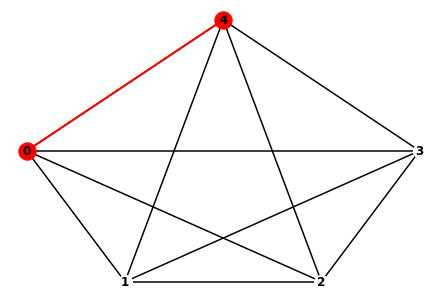

component 2 diameter: 1


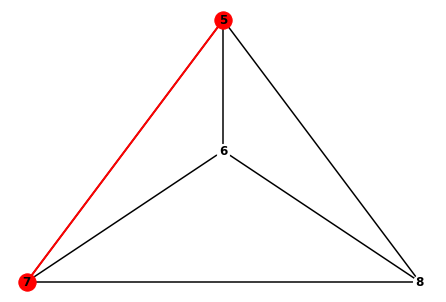

In [8]:
number_of_component = 0
for component in nx.connected_components(Graph):
    sub = Graph.subgraph(component)
    number_of_component += 1
    if len(sub.nodes()) > 1:
        number_of_edges = []
        for node in sub.nodes():
            dim_edge = []
            way = nx.shortest_path(sub, node)
            for el in way.values():
                number_of_edges.append(len(el) - 1)
                if len(el) > 1:
                    dim_edge.append(el)
                dim = max( number_of_edges)
                
        edge_list_in_diameter = del_duplicate_edges(dim_edge)
        red_node = diameter_node_list(edge_list_in_diameter, dim)
        red = split_into_parts(edge_list_in_diameter,red_node)
        red_edge = del_duplicate_edges(split_into_parts(edge_list_in_diameter,red_node))

        print("component", number_of_component, "diameter:", dim)
        nx.draw(sub, pos=pos, **base)
        nx.draw_networkx_nodes(sub, pos=pos, nodelist=red_node, node_color="red")
        nx.draw_networkx_edges(sub, pos=pos, edgelist=red_edge, edge_color="red", width=2)
        plt.show()
    else:
        pass


#6

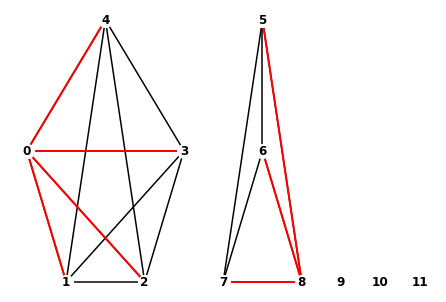

In [10]:
edges = set()
for component in nx.connected_components(Graph):
    sub = Graph.subgraph(component)
    first_node = list(sub.nodes)[0]
    tree = nx.bfs_tree(sub, first_node)
    tree_edge = tree.edges()
    edges.update(tree_edge)
nx.draw(Graph,pos= pos, **base)
nx.draw_networkx_edges(Graph, pos=pos, edgelist=edges, edge_color="red", width=2)
plt.savefig("Tree.png")
plt.show()
